# Main

In [1]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import networkx as nx
import os

In [2]:
# Leemos el archivo
myFolder = (os.getcwd()) # busca en el directorio actual

#Acá paso los datos a una lista de strings y recorro todos
L=['4','16','32','64','128'];
#L=['4','16'];


#-----cosas para graficar: 
#----A determinar Pc(inf), nu y tau
#Pc vs L ╬
#Pc vs dispersión
#Determinar nu (franco lo hace con log(Pc(L)-Pc(inf))) vs log L
#F(p) vs p
            
#----B determinar D (dimensión fractal)
#log(ns) vs log(s)
#chi^2 vs p

#----C obtener beta a partir de la P(inf)
#log M vs log L, donde M es la masa
#Pinf(p) vs (p-pc)
#log(Pinf(p)) vs log (p-pc)


# Ejercicio 1.

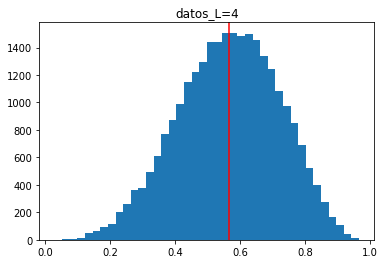

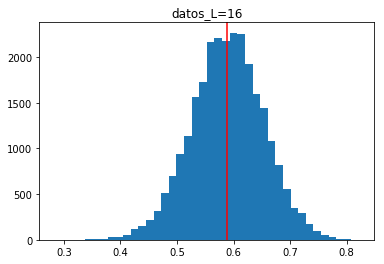

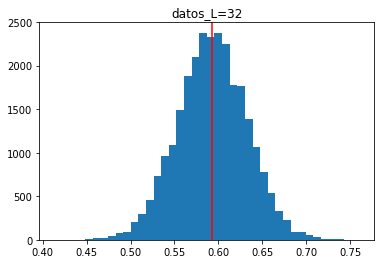

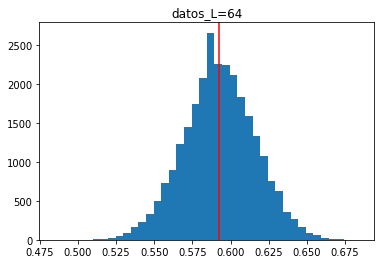

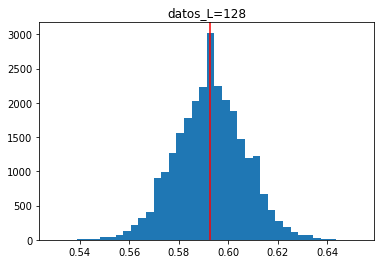

[[4, 0.564184115193718, 0.1548746915246145], [16, 0.588593296281206, 0.06384974570688383], [32, 0.5927316593821765, 0.039435612911127176], [64, 0.5926158742869843, 0.02343423829896684], [128, 0.5926359472553523, 0.01399070926885593]]


In [3]:
pc_mean = [];
pc_std = [];
pc_L =[]; 
#quiero promediar mis pc para cada L
for i,l in enumerate(L):
#l='4'
    with open (myFolder+'/datos_ej1/datos_ej1_L='+l+'.txt', 'r') as mf: 
        myfile=mf.read()
        datos = [float(i) for i in myfile.split(' ')[:-3] if i.strip()];
        pc_mean= np.mean(datos);
       # print(pc_mean)
        pc_std=np.std(datos);
        ls=[int(l), pc_mean, pc_std];
       # plt.subplot(5 1 i+1)
        plt.hist(datos,bins=40)
        plt.title('datos_L='+l)
        plt.axvline(pc_mean,color='red')
        plt.show()
    pc_L.append(ls)
    mf.close()
print(pc_L)

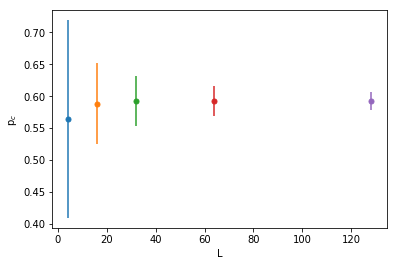

In [4]:
#grafiquemos
name='pcvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.scatter(pc_L[i][0],pc_L[i][1],s=25,label="L="+l)
    plt.errorbar(pc_L[i][0],pc_L[i][1],pc_L[i][2])
    
plt.xlabel('L')
plt.ylabel('p$_{{c}}$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()




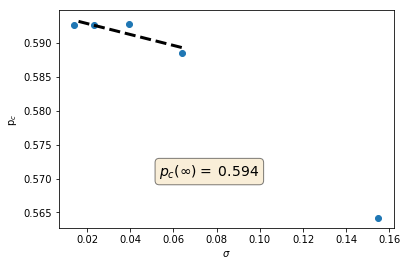

In [51]:
#grafiquemos
name='Pinf'
from scipy import optimize

x=[]
y=[]
fig=plt.figure()
ax = plt.subplot(111)
for i in range(0,len(pc_L)):
    #plt.scatter(pc_L[i][2],pc_L[i][1],s=25,label="L="+l)
    x.append(pc_L[i][2]);
    y.append(pc_L[i][1]);

x_g=np.asarray(x);    
y_g=np.asarray(y);  
x=np.asarray(x)[1:6]; #estan desordenados, los ultimos son los primeros.
y=np.asarray(y)[1:6];    
fitfunc = lambda p, x: p[0]*x+p[1]# Funcion con la que queremos fitear la data
p0 = [1, 1] # Parametros iniciales para fitear
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
p1, success = optimize.leastsq(errfunc, p0[:], args=(x, y))
#p1 es [pendiente, origen]
plt.plot(x_g, y_g,'o', x, fitfunc(p1, x), "k--",linewidth=3) # ploteo la data y el ajuste
plt.xlabel('$\sigma$')
plt.ylabel('p$_{{c}}$')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.3, 0.3, '$p_{c}(\infty)=$ %0.3f' %round(p1[1],3), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#plt.title(name)
plt.savefig(name+'_grafico.png')
plt.show()


[-0.030301578147400754, -0.005892397059912735, -0.0017540339589422471, -0.001869819054134525, -0.0018497460857664905]
[0.1538746915246145, 0.06284974570688383, 0.038435612911127175, 0.02243423829896684, 0.01299070926885593]


<Figure size 432x288 with 0 Axes>

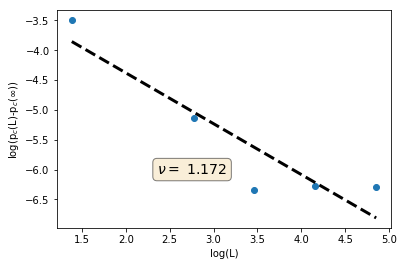

In [52]:
####PRECAUCION REESCRIBE ALGO, ASI QUE UNA VEZ Q CORRIO HAY QUE VOLVER A CORRER EL ANTERIOR
#grafiquemos
name='nu'
plt.figure()
diff =[]
logL =[]
diff=[]
differr=[]
y_a=[]
yerr=[]

fig=plt.figure()
ax = plt.subplot(111)
for i in range(0,len(pc_L)):
    logL.append(np.log(float(pc_L[i][0])))
    diff.append(float(pc_L[i][1]-p1[1]));
    differr.append(float(pc_L[i][2]-0.001));

print(diff)
print(differr)
y_a = [np.log(abs(x)) for x in diff]
yerr = [np.log(abs(x)) for x in differr]


x_g=np.asarray(logL);    
y_g=np.asarray(y_a);  
x=np.asarray(logL); #estan desordenados, los ultimos son los primeros.
y=np.asarray(y_a);    

fitfunc = lambda p, x: p[0]*x+p[1]# Funcion con la que queremos fitear la data
p0 = [1, 1] # Parametros iniciales para fitear
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distancia a la función objetivo
p1, success = optimize.leastsq(errfunc, p0[:], args=(x, y))
#p1 es [pendiente, origen]
plt.plot(x_g, y_g,'o', x, fitfunc(p1, x), "k--",linewidth=3) # ploteo la data y el ajuste


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
nu=-(1/p1[0]);
fig.text(0.3, 0.3, r'$\nu=$ %0.3f' %round(nu,3), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel('log(L)')
plt.ylabel('log(p$_{c}$(L)-p$_{c}$($\infty$))')

plt.savefig(name+'_grafico.png')
plt.show()


# Metodo 2.

In [178]:
prob_total =[]; #esto sería una lista de listas donde cada elemento es el archivo
fz_perc_total =[];
percola_tot=[];
ns_total = [];

for j,l in enumerate(L):
    #with open (myFolder+'/datos_ejercicios/Tablas_L='+l+'_refinado.txt', 'r') as myfile: 
    with open (myFolder+'/datos_ejercicios/Tablas_L='+l+'.txt', 'r') as myfile: 
 
        probabilidad_L = [];
        fz_percolante_L =[];
        percola_L = [];
        ns_L = [];
        h=0;
        for myline in myfile: # For each line, stored as myline,
            datos = [i for i in myline.split(' ') if i.strip()];
            largo=len(datos);           #tomo la primera, pero todas tienen misma cantidad de elementos
    
            if largo > 1: #esto lo hice para evitar las filas de los 'x00'
                probabilidad_L.append(float(datos[0]));


                percola_L.append(float(datos[1]));
                ns_L.append([float (i) for i in datos[2:]]);                 
                h=h+1;
        print (h);
    prob_total.append(probabilidad_L)
    fz_perc_total.append(fz_percolante_L);
    percola_tot.append(percola_L);
    ns_total.append(ns_L);
    myfile.close()


91
91
91
91
91


Método 2

No handles with labels found to put in legend.


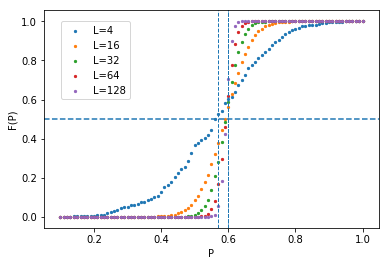

los p criticos son: [['4', 0.57, 0.01], ['16', 0.6, 0.01], ['32', 0.6, 0.01], ['64', 0.6, 0.01], ['128', 0.6, 0.01]]
y sus errores: 0.010000000000000009


In [179]:
#grafiquemos
#promedio para cada L
#grafiquemos
#promedio para cada L
name1='FvsP'

plt.figure()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
pc_L2=[]
arg_p=[]
error=[]
for i,l in enumerate(L):
    k=0
    while percola_tot[i][k]<0.5:
        k+=1
    pc=(prob_total[i][k]+prob_total[i][k])/2
    

    arg_p.append(k)
    error=((prob_total[i][k+1]-prob_total[i][k-1])/2)
    pc_L2.append([l,round(pc,3),round(error,3)])
    plt.scatter(prob_total[i],percola_tot[i],s=5,label="L="+l);
    plt.axvline(pc, linestyle='--',linewidth=1) 

#busco en esa lista todas las posiciones posibles para un pc y las promedio
#x=list(range(0,1));
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.axhline(0.5, linestyle='--') 

plt.xlabel('P')
plt.ylabel('F(P)')
#plt.legend('P_{c}=',pc)
plt.savefig(name1+'_'+l+'.png')    
plt.show()
    
print('los p criticos son:', pc_L2)
print('y sus errores:', error)

In [180]:
print([round(i[1],4) for i in pc_L2])
print([round(i[1],4) for i in pc_L])

[0.57, 0.6, 0.6, 0.6, 0.6]
[0.5642, 0.5886, 0.5927, 0.5926, 0.5926]


Método 3

/home/lucia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


1.4585971250944725
1.96606208980141
1.7726700430666817
1.7369329265137339
1.8028498639337032


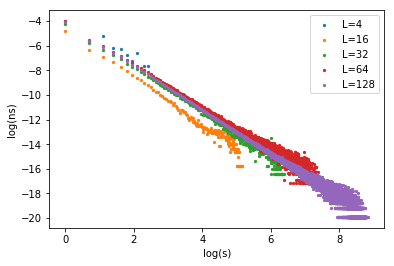

In [438]:
import math
name2='lognsvslogs'
restar=[-8,-15,-16,-17,-20]
#quiero graficar log(ns) vs log(s)
#for i,l in enumerate(L):
pc_L3=[]
for k,l in enumerate(L):
    Resultados=[]
    for i in range(0,90):
        ns=[r/int(l)**2 for r in ns_total[k][i]]
  #     ns=ns_total[k][i]
   #     print(ns[2:5])
        log_ns=[]
        log_s=[]
        for j in range(1,len(ns)):
            if(ns[j]>0 and np.log(ns[j])<10**7):
                log_ns.append(np.log(ns[j]));
                log_s.append(np.log(j));

        try: #Agregue porque hay un error con un par de valores muy grandes
            [tau,q]=np.polyfit(log_s,log_ns,1)
        except:
          #  print(l,i,log_s,log_ns)
            pass
        #plt.scatter(log_s,log_ns)
        chi=0
        for j in range(1,len(ns)):
            if(ns[j]>0):
                res=(np.log(ns[j])-(tau*np.log(j)+q))**2

            else:
                #Esto no esta muy bien resuelto. es para sumar algo cuando ns es 0
                res=(restar[k]-(tau*np.log(j)+q))**2
            chi+=res
        Resultados.append([prob_total[k][i],tau,q,chi])
    arg=np.argmin([i[3] for i in Resultados])
    pc=(Resultados[np.argmin([i[3] for i in Resultados])][0])
    plt.scatter(np.log(range(0,len(ns_total[k][arg]))),np.log([r/int(l)**2 for r in ns_total[k][arg]]),s=5)
    tau=-Resultados[arg][1] #tau correspondiente al min
    #Printeamos todos los tau a ver si alguno da mejor
    print(tau)
    pc_L3.append([l,pc,0.1])
plt.legend(['L='+l for l in L])
plt.xlabel('log(s)')
plt.ylabel('log(ns)')
##plt.title('distribución de los ns para las pc')
plt.show()



In [439]:
Resultados

[[0.1, -6.555580966809114, 0.37911979747451363, 22747840.982865002],
 [0.11, -6.245877066540493, 0.3462215025087004, 19598259.594687995],
 [0.12, -6.320255385339625, 0.7676429460932063, 19866207.116837904],
 [0.13, -5.9938658012648265, 0.6378159978835847, 16878418.154148996],
 [0.14, -6.134875703938875, 1.1455837836954614, 17658368.607214928],
 [0.15, -6.1177717324900565, 1.402569998364416, 17228572.947914712],
 [0.16, -5.814906576737764, 1.2263878997073405, 14701170.4717015],
 [0.17, -5.9852109074683275, 1.7881386934589918, 15634358.297568332],
 [0.18, -5.700631385299723, 1.5980146569751899, 13394210.157285916],
 [0.19, -5.637270208433123, 1.739872092135757, 12753548.758179454],
 [0.2, -5.552500542627008, 1.841956463968451, 11997281.9759659],
 [0.21, -5.503448865568564, 2.01823830915379, 11470615.050260955],
 [0.22, -5.6899089942739645, 2.6073389626784444, 12399119.151645796],
 [0.23, -5.454190493437662, 2.4257330425977073, 10763614.71658875],
 [0.24, -5.313303469044889, 2.38744574861

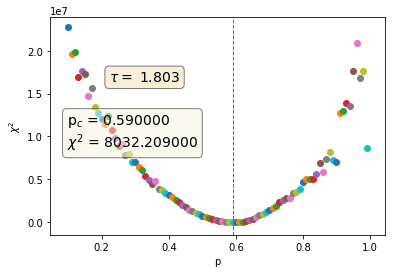

In [440]:
#Ejemplo de un chi, para L=128
name='chi2'
fig=plt.figure()
ax1 = plt.subplot(332)
ax2 = plt.subplot(111)

for j in range(0,len(Resultados)):
    plt.scatter(Resultados[j][0],Resultados[j][3])
    
pos=np.argmin([i[3] for i in Resultados]) #pos que min chi^2
p_c=Resultados[np.argmin([i[3] for i in Resultados])][0]
tau=-Resultados[pos][1] #tau correspondiente al min
chi=Resultados[pos][3] #chi correspondiente al min
plt.xlabel('p')
plt.ylabel('$\chi^{2}$')
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='beige', alpha=0.5)


# place a text box in upper left in axes coords
fig.text(0.3, 0.3, r'${\tau} =$ %0.3f' %round(tau,3), transform=ax1.transAxes, fontsize=14,
       position=(-0.6,0.), bbox=props1)

# place a text box in upper left in axes coords
fig.text(0.3, 0.3, 'p$_{{c}}$ = %f \n$\chi^{2}$ = %f' %(p_c, round(chi,3)), transform=ax2.transAxes, fontsize=14,
        position=(0.05,0.4), bbox=props2)

plt.axvline(p_c, linestyle='--',linewidth=1) 

#plt.title(name)
plt.savefig(name+'_grafico.png')
plt.show()

In [441]:
print([round(i[1],3) for i in pc_L])
print([round(i[1],3) for i in pc_L2])
print([round(i[1],3) for i in pc_L3])
#No se porque no da bien el metodo 3 para L=4

[0.564, 0.589, 0.593, 0.593, 0.593]
[0.57, 0.6, 0.6, 0.6, 0.6]
[0.74, 0.71, 0.63, 0.59, 0.59]


In [269]:
import pandas as pd

info = pd.DataFrame({"L":L,"Método 1":[round(i[1],3) for i in pc_L],"Error 1":[round(i[2],3) for i in pc_L],"Método 2":[round(i[1],3) for i in pc_L2],"Error 2":[round(i[2],3) for i in pc_L2],"Método 3":[round(i[1],3) for i in pc_L3],"Error 3":[round(i[2],3) for i in pc_L3]},columns=['L','Método 1','Error 1','Método 2','Error 2','Método 3','Error 3'])
print(info)

     L  Método 1  Error 1  Método 2  Error 2  Método 3  Error 3
0    4     0.564    0.155      0.57     0.01      0.77      0.1
1   16     0.589    0.064      0.60     0.01      0.72      0.1
2   32     0.593    0.039      0.60     0.01      0.63      0.1
3   64     0.593    0.023      0.60     0.01      0.60      0.1
4  128     0.593    0.014      0.60     0.01      0.60      0.1


## Ejercicio 3

7
9.326185
5
115.355186
5
421.831451
3
1578.860107
3
6124.726562


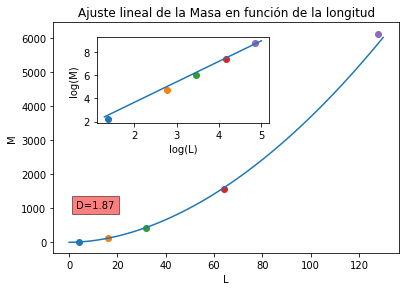

In [187]:
#p0=['04','05','05','056','057','058' ]

            
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.55, 0.4, 0.3]) # inset axes
prob_Total=[]
M_Total=[]
logL=[]
logM=[]
for i,l in enumerate(L):
    with open (myFolder+'/datos_ej2y3/Ej2y3_L='+l+'.txt', 'r') as myfile: 
   
        proba_L = [];
        fz_percolante_L =[];
        percola_L = [];
        h=0;
        for myline in myfile: # Calcula los datos del Ej2y3.txt,
            datos = [i for i in myline.split(' ') if i.strip()];
            proba_L.append(float(datos[0]))    
            fz_percolante_L.append(float(datos[1]))    
        prob_Total.append(proba_L)
        M_Total.append(fz_percolante_L)
        pc=round(pc_L2[i][1],2) #Usamos el metodo 2
        
        arg=proba_L.index(pc) #indice de la pc
        print(arg)
        M=fz_percolante_L[arg]
        print(M)
        axes1.scatter(float(l),M)
        axes2.scatter(math.log(float(l)),math.log(M))

        logL.append(np.log(float(l)))
        logM.append(np.log(M))
[m,b]=np.polyfit(logL,logM,1)
axes1.plot(np.linspace(0,130),np.exp(b)*np.linspace(0,130)**m) 
axes1.text(3,1000,'D='+str(round(m,3)),bbox=dict(facecolor='red', alpha=0.5))
#axes1.title('Distribución')
axes2.set_xlabel("log(L)")
axes2.set_ylabel("log(M)")

axes2.plot(np.linspace(1.3,5),m*np.linspace(1.5,5)+b)
axes1.set_xlabel("L")
axes1.set_ylabel("M")
axes1.set_title('Ajuste lineal de la Masa en función de la longitud')
plt.show()

In [102]:
91/48

1.8958333333333333

In [53]:
#USANDO QUE SIGMA = 1/(NU*D)
sigma=1/(nu*1.87);
print('sigma es=',sigma)

sigma es= 0.4563177113627419


## Ejercicio 2

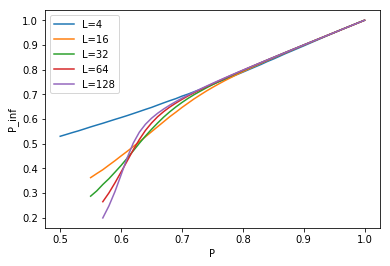

<Figure size 432x288 with 0 Axes>

In [197]:
#grafiquemos



name1='Cluster_percolante'

plt.figure()
for i,l in enumerate(L):
    
    p=prob_Total[i]
    pinf=[i/(int(l)**2) for i in M_Total[i]]
    #Agregar los 0s al plotear
#    plt.scatter(np.hstack([np.linspace(0,(prob_Total[i][0]),30),p]),np.hstack([[0]*len(np.linspace(0,(prob_Total[i][0]),30)),(pinf)]))
    plt.plot(p,pinf)
    plt.xlabel('P')
    plt.ylabel('P_inf') 
plt.legend(['L='+l for l in L])

plt.show()

 #   plt.leggend(l)

#plt.legend('P_{c}=',pc)
plt.savefig(name1+'_'+l+'.png') 


Para mi dan cualquier batata porque estan mal los datos

### Ejercicio 4 y 5 

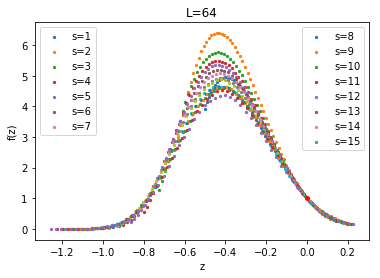

In [105]:
tau=2.1
pc=pc_L2[3][1]
probabilidad_64=prob_total[3]
arg=probabilidad_64.index(pc)
sigma=0.34
ns=ns_total[3]

fig = plt.figure()
ax = fig.add_subplot(111)

for j in range(1,16):
    f=[]
    z=[]
    for i in range(0,60):
        f.append(float(ns[i][j])/float(ns[arg][j]))
        z.append(j**sigma*(prob_total[3][i]-pc))
    plt.scatter(z,f, s=5,label=('s='+str(j)))

a=['s='+str(x) for x in list(range(1,8))]
b=['s='+str(x) for x in list(range(8,16))]
leg1 = plt.legend(a,loc=2)
leg2 = plt.legend(b,loc=1)
ax.add_artist(leg1)

plt.scatter(0,1,s=15,c='red')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('L=64')

plt.show()

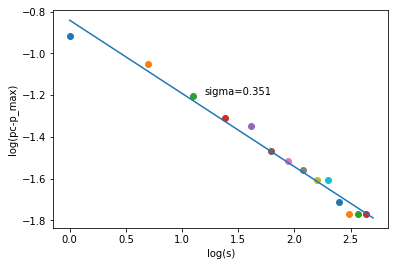

In [106]:
import math
ns=np.asarray(ns)
s=1
x=[]
y=[]
S=[]
P_graf=[]
P_max=[]
NS_max=[]
for eses in ns.T[1:15]:
    #print (eses)
    p_max=probabilidad_64[np.argmax(eses)] #El p donde se maximiza la cantidad de clusters para cada s 
    ns_max=ns[np.argmax(eses)][s-1]#s-1 porque el s empezó en 1
    P_max.append(p_max)
    NS_max.append(ns_max)
   # print(p_max)
    p_graf=-(p_max-pc) #eps
    plt.scatter(math.log(s),math.log(p_graf))
    x.append(math.log(s))
    y.append(math.log(p_graf))
    S.append(s)
    P_graf.append(p_graf)
    s+=1
valores=np.polyfit(x,y,1)#La correlación es menos sigma
pol=np.poly1d(valores)
plt.plot(np.linspace(0,2.7),pol(np.linspace(0,2.7)))
plt.xlabel('log(s)')
plt.ylabel('log(pc-p_max)')
plt.text(1.2,-1.2,'sigma='+str(round(-valores[0],3)))
plt.show()
#Si queremos aca hace el grafico libre de escalas
#plt.scatter(S,P_graf)
#plt.plot(np.linspace(0,14),np.linspace(0,14)**valores[0]*math.e**valores[1])
#plt.xlabel('s')
#plt.ylabel('pc-p_max')
#plt.show()

Calculado con nuestras constantes, y marcando el p max que tomamos

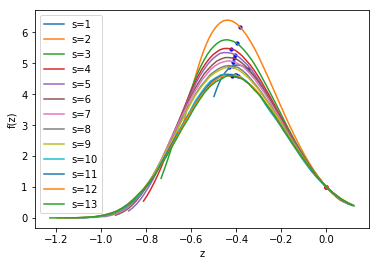

In [107]:
tau=2.1
pc=pc_L2[3][1]
sigma=-valores[0]
arg=probabilidad_64.index(pc)
ns=ns_total[3]

for j in range(1,14):

        f_max=(float(NS_max[j])/float(ns[arg][j]))
        z_max=(j**sigma*(P_max[j]-pc))

        f=[]
        z=[]
        for i in range(0,56):
            f.append(float(ns[i][j])/float(ns[arg][j]))
            z.append(j**sigma*(probabilidad_64[i]-pc))
        plt.plot(z,f,label=('s='+str(j)))
        plt.scatter(z_max,f_max,s=10,c='blue')

plt.legend()
plt.scatter(0,1,s=15,c='red')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.show()

/home/lucia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


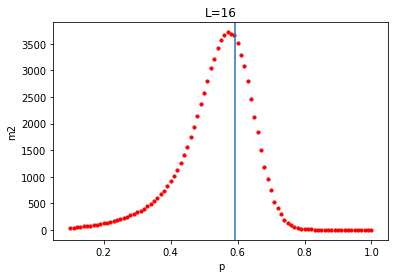

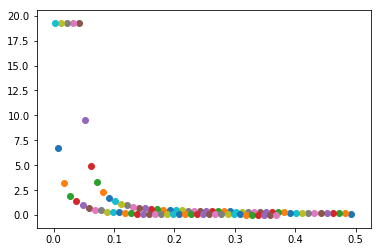

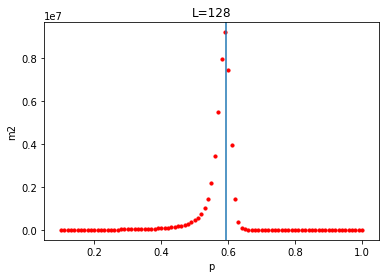

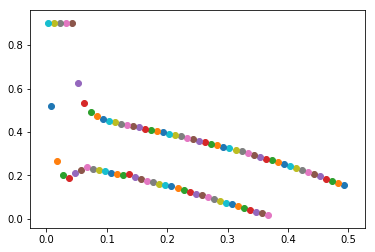

In [203]:
for j in [1,4]:
    ns=ns_total[j]
    i=0
    momentos=[]
    log_m=[]
    log_eps=[]
    for tira in ns:
        p=prob_total[j][i]
        pc=pc_L2_ref[j][1]
        arg=prob_total[j].index(round(pc,2))
        i+=1
        m2=0
        for k in range(0,len(tira)):
            m2=m2+tira[k]*(k**2);
        momentos.append(m2)
    plt.scatter(prob_total[j],momentos,s=10,c='red') 
    log_m=np.log(momentos)
    log_eps=np.log([abs(prob-pc) for prob in prob_total[j]])
    plt.axvline(pc)
    plt.xlabel('p')
    plt.ylabel('m2')
    plt.title('L='+L[j])
    plt.show()
    #plt.scatter(log_eps,log_m,s=10)
    nu=[]
    nu_tot=[]
    cp=4
    for k in range(len(ns)-cp):
        if prob_total[j][k]>pc and prob_total[j][k+cp]>pc:
            
            [NU,b]=np.polyfit(log_m[k:k+cp],log_eps[k:k+cp],1)
            
        elif prob_total[j][k]<pc and prob_total[j][k+cp]<pc:
            
            
            [NU,b]=np.polyfit(log_m[k:k+cp],log_eps[k:k+cp],1)
        plt.scatter(abs(prob_total[j][k]-pc),-NU)
        #print(NU)
    nu.append(-NU)
    nu_tot.append(nu)
    plt.show()

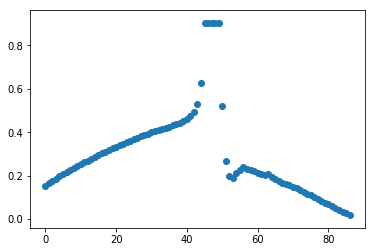

In [168]:
plt.scatter(range(len(nu_tot[0])),nu_tot[0])

(array([11., 17., 22., 12., 15.,  4.,  1.,  0.,  0.,  5.]),
 array([0.01822217, 0.10664824, 0.1950743 , 0.28350036, 0.37192643,
        0.46035249, 0.54877855, 0.63720462, 0.72563068, 0.81405674,
        0.90248281]),
 <a list of 10 Patch objects>)

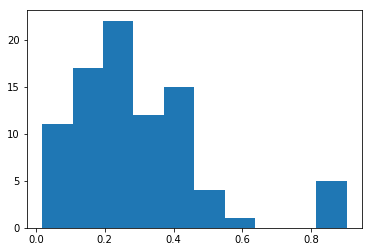

In [169]:
plt.hist(nu_tot[0])

In [ ]:
for j in [1,4]:
    ns=ns_total[j]
    i=0
    
    for tira in ns:
        p=prob_total[j][i]
        pc=pc_L2_ref[j][1]
        i+=1
        if p>pc:
            
       
        m2=0
        for k in range(0,len(tira)):
            m2=m2+tira[k]*(k**2);
        momentos.append(m2)
    plt.scatter(prob_total[j],momentos,s=10,c='red') 
    plt.axvline(pc)
    plt.xlabel('p')
    plt.ylabel('m2')
    plt.title('L='+L[j])
    plt.show()

# Renormalizacion

In [54]:
import scipy.optimize as optimize


#defino mi funcion 1
def func1(x):
    return 4*(1-x)*x**3+x**4

# This finds the value of x such that func(x) = x, that is, where
# 4*(1-x)*x**3+x**4
print(optimize.fixed_point(func1,0.6))
# 0.682327803828


#defino mi funcion 2
def func2(x):
    return 2*x**2-x**4
print(optimize.fixed_point(func2,0.7))


0.7675918792439982
0.6180339887498952
